## This script will analyze the cross-correlation of two signals


In [1]:
# imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import argparse
import astropy.units as u  
import os
import glob

In [2]:
# define some functions
# plotting 
def hdfig(subplots_def=None, scale=0.5):
    fig = plt.figure(figsize=(8, 4.5), dpi=scale * 1920 / 8)
    if subplots_def is None:
        return fig
    else:
        return fig, fig.subplots(*subplots_def)

# Calculate autocorrelation for each antenna
def calculate_autocorrelation(data):
    autocorr = sp.signal.fftconvolve(data, np.conj(data[::-1]), mode='full')
    return autocorr

# Calculate cross-correlation between two antennas as a function of delay
def calculate_cross_correlation(data1, data2):
    cross_corr = sp.signal.fftconvolve(data1, np.conj(data2[::-1]), mode='full')
    return cross_corr


In [3]:
# now read in the data

# measurement_path = os.path.join(os.path.dirname(__file__), 'measurements')
measurement_path = '/Users/bjhnieuwhof/Downloads/3test airspies/'
files = sorted(glob.glob(measurement_path + '*', recursive=True))
print(files)
downsample_factor = 10
cutoff = 100000000
data_per_antenna = [np.fromfile(fil, dtype=np.complex64)[:cutoff:downsample_factor] for fil in files]
print(len(data_per_antenna[0]))
# Sample interval calculation
delta_freq = 2.5e6 * u.Hz
sample_interval = (1 / (2 * delta_freq)).to(u.s)

# Set the window for the plot
w = 100000



['/Users/bjhnieuwhof/Downloads/3test airspies/3test_Airspy0', '/Users/bjhnieuwhof/Downloads/3test airspies/3test_Airspy1', '/Users/bjhnieuwhof/Downloads/3test airspies/3test_Airspy2']
10000000


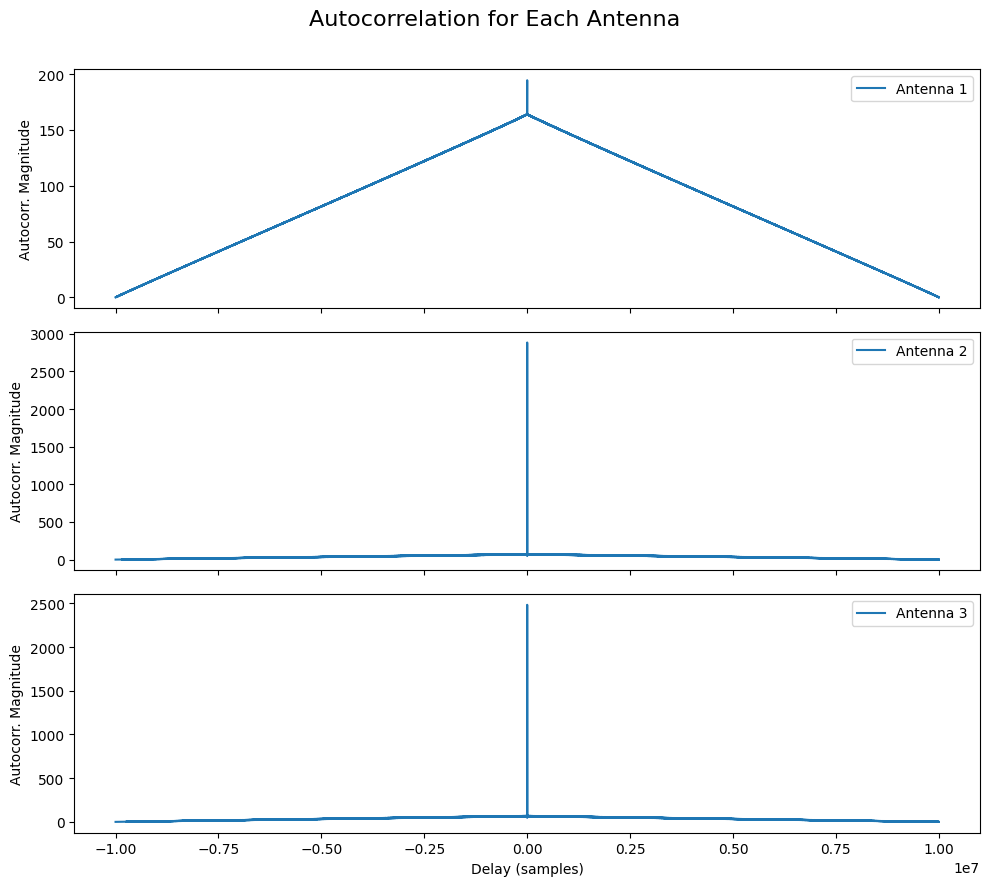

In [4]:

# Plot autocorrelation for each antenna in subplots
num_antennas = len(data_per_antenna)
fig, axes = plt.subplots(nrows=num_antennas, ncols=1, figsize=(10, 3 * num_antennas), sharex=True)
fig.suptitle("Autocorrelation for Each Antenna", fontsize=16)

for i, data in enumerate(data_per_antenna):
    autocorr = calculate_autocorrelation(data)
    lags = np.arange(-len(data) + 1, len(data))  # Calculate lag values
    axes[i].plot(lags, np.abs(autocorr), label=f'Antenna {i+1}')
    axes[i].set_ylabel("Autocorr. Magnitude")
    axes[i].legend(loc='upper right')

axes[-1].set_xlabel("Delay (samples)")
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit title
plt.show()

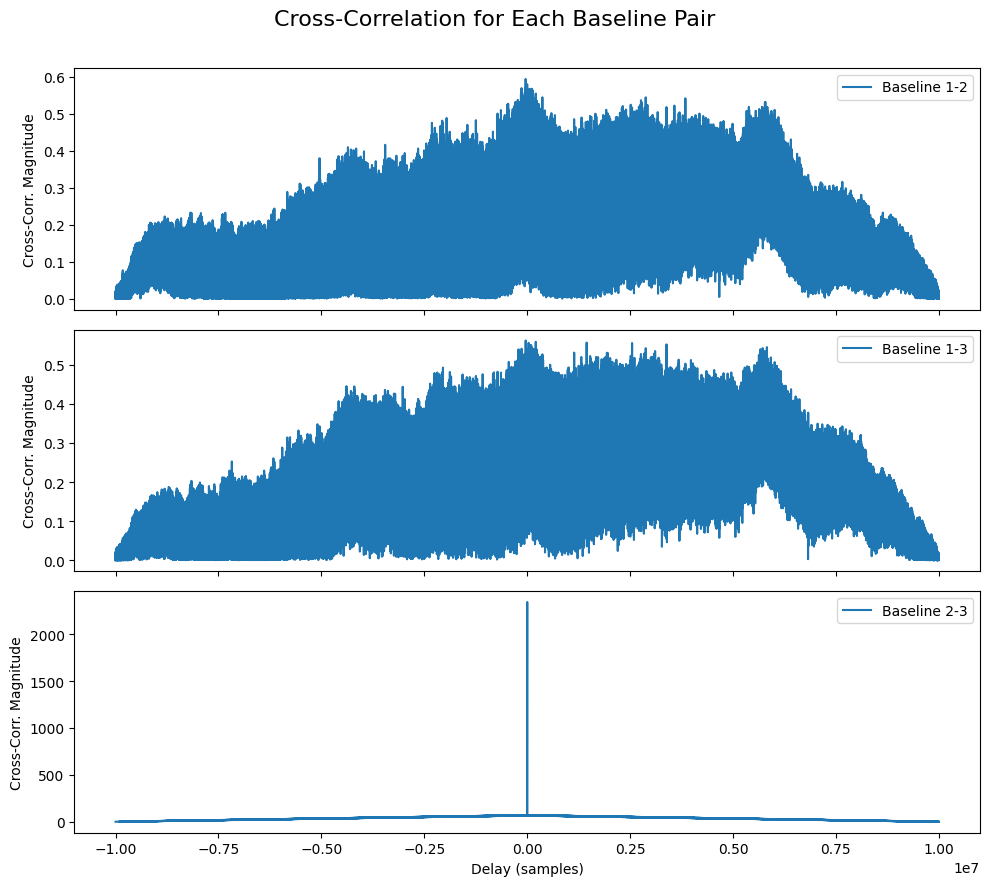

In [5]:
# plot cross-correlation for each baseline pair
# Calculate the number of unique pairs
num_antennas = len(data_per_antenna)
num_baselines = num_antennas * (num_antennas - 1) // 2  # Combination count for unique pairs

# Set up subplots for cross-correlations for each baseline pair
fig, axes = plt.subplots(nrows=num_baselines, ncols=1, figsize=(10, 3 * num_baselines), sharex=True)
fig.suptitle("Cross-Correlation for Each Baseline Pair", fontsize=16)
axes = np.ravel([axes])

# Iterate over antenna pairs and plot their cross-correlation
subplot_index = 0
for i in range(num_antennas):
    for j in range(i + 1, num_antennas):
        cross_corr = calculate_cross_correlation(data_per_antenna[i], data_per_antenna[j])
        lags = np.arange(-len(data_per_antenna[i]) + 1, len(data_per_antenna[i]))  # Calculate lag values
        axes[subplot_index].plot(lags, np.abs(cross_corr), label=f'Baseline {i+1}-{j+1}')
        axes[subplot_index].set_ylabel("Cross-Corr. Magnitude")
        axes[subplot_index].legend(loc='upper right')
        subplot_index += 1

# Set the last x-axis label and adjust layout
axes[-1].set_xlabel("Delay (samples)")
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit title
plt.show()